### DiCOM

Dicom format의 CT영상은 512x512 사이즈로 되어 있으며, 일반적으로 -1024 ~3096의 HU 값을 포함합니다.

HU 값을 그대로 사용하여도 무방하지만 256 Grayscale로 변환하여 사용할 수 있습니다.

HU to Grayscale의 변환 방법은 다양하지만 대표적인 방법은 다음과 같습니다.

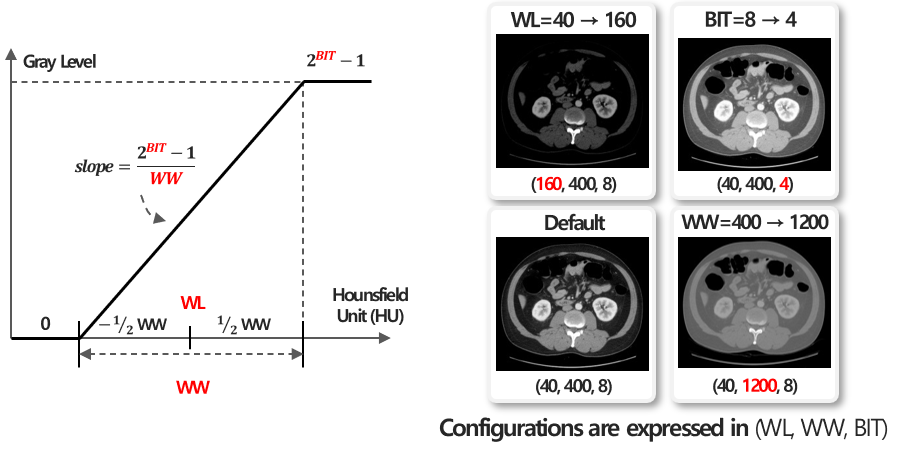

In [40]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt

In [41]:
def transform_to_hu(medical_image, image):
    hu_image = image * medical_image.RescaleSlope + medical_image.RescaleIntercept
    hu_image[hu_image < -1024] = -1024
    return hu_image

def apply_window(image, window_center, window_width):
    window_image = image.copy()
    image_min = window_center - (window_width / 2)
    image_max = window_center + (window_width / 2)
    window_image[window_image < image_min] = image_min
    window_image[window_image > image_max] = image_max
    return window_image

def resize_normalize(image):
    image = np.array(image, dtype=np.float64)
    image -= np.min(image)
    image /= np.max(image)
    return image

def read_dicom(path, window_width, window_level):
    image_medical = pydicom.dcmread(path)
    image_data = image_medical.pixel_array

    image_hu = transform_to_hu(image_medical, image_data)
    image_window = apply_window(image_hu.copy(), window_level, window_width)
    image_window_norm = resize_normalize(image_window)

    image_window_norm = np.expand_dims(image_window_norm, axis=2)   # (512, 512, 1)
    image_ths = np.concatenate([image_window_norm, image_window_norm, image_window_norm], axis=2)   # (512, 512, 3)
    return image_ths

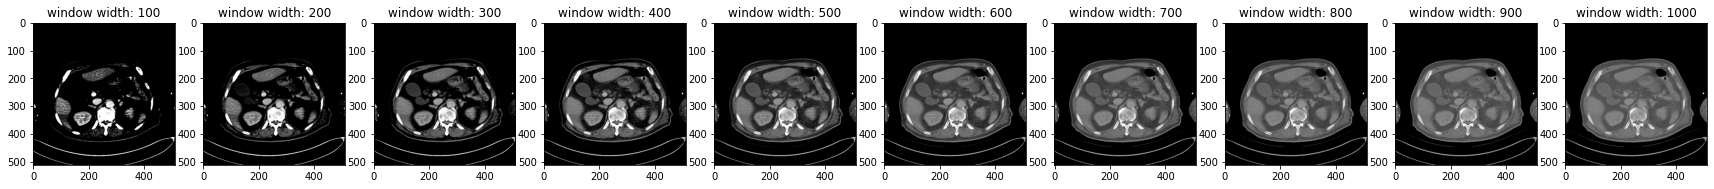

In [90]:
plt.figure(figsize=(30,10))
for ww in np.arange(100,1100,100):
    dcm = read_dicom('dcm_sample.dcm',ww,100)
    plt.subplot(1,10,ww//100)
    plt.title(f"window width: {ww}")
    plt.imshow(dcm)
plt.show()